In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_data.columns = test_data.columns.str.lower()
test_data['survived'] = 0

In [5]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [6]:
train_data.columns = train_data.columns.str.lower()
train_data.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
len(train_data)

891

In [8]:
train_data = pd.concat([train_data,test_data], axis=0)

In [9]:
train_data[890:-1] #891 to end is the test dataset

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,0,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [10]:
train_data.reset_index(drop=True, inplace=True)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [12]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
passengerid,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
survived,1309.0,NaN,NaN,NaN,0.261268,0.439494,0.0,0.0,0.0,1.0,1.0
pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


In [13]:
train_data.age.fillna(train_data.age.mean(), inplace=True)
train_data.cabin.fillna('UNKWN', inplace=True)

/tmp/ipykernel_17/818126445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.age.fillna(train_data.age.mean(), inplace=True)
/tmp/ipykernel_17/818126445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [14]:
train_data['survived'].value_counts()/len(train_data)*100

survived
0    73.873186
1    26.126814
Name: count, dtype: float64

Text(0.5, 1.0, 'Age vs survival rate')

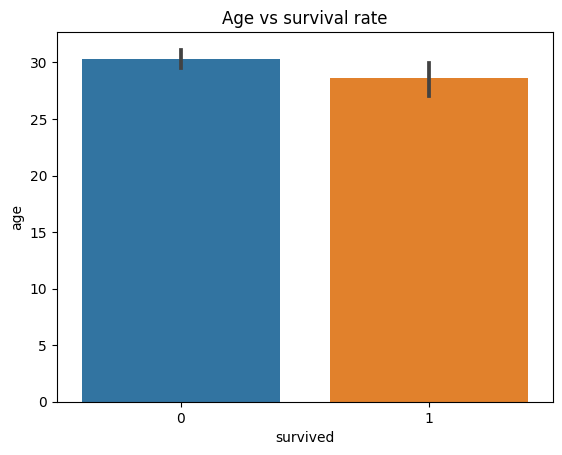

In [15]:
ax = sns.barplot(data=train_data,x='survived',y='age')
ax.set_title('Age vs survival rate')
# plt.show()

In [16]:
train_data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [17]:
df = train_data[['passengerid', 'survived', 'pclass', 'age', 'sibsp',
       'parch', 'fare']]

In [18]:
df.corr().style.background_gradient(cmap='viridis')

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.331493,-0.038354,0.025731,-0.055224,0.008942,0.031428
survived,-0.331493,1.000000,-0.244686,-0.060203,-0.014375,0.054908,0.173653
pclass,-0.038354,-0.244686,1.000000,-0.366371,0.060832,0.018322,-0.558629
age,0.025731,-0.060203,-0.366371,1.000000,-0.190747,-0.130872,0.171893
sibsp,-0.055224,-0.014375,0.060832,-0.190747,1.000000,0.373587,0.160238
parch,0.008942,0.054908,0.018322,-0.130872,0.373587,1.000000,0.221539
fare,0.031428,0.173653,-0.558629,0.171893,0.160238,0.221539,1.000000


In [19]:
train_data.drop(['name','ticket','cabin'],axis=1,inplace=True)

In [20]:
train_df = pd.get_dummies(train_data, columns = ['sex', 'embarked'], dtype=int)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   age          1309 non-null   float64
 4   sibsp        1309 non-null   int64  
 5   parch        1309 non-null   int64  
 6   fare         1308 non-null   float64
 7   sex_female   1309 non-null   int64  
 8   sex_male     1309 non-null   int64  
 9   embarked_C   1309 non-null   int64  
 10  embarked_Q   1309 non-null   int64  
 11  embarked_S   1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


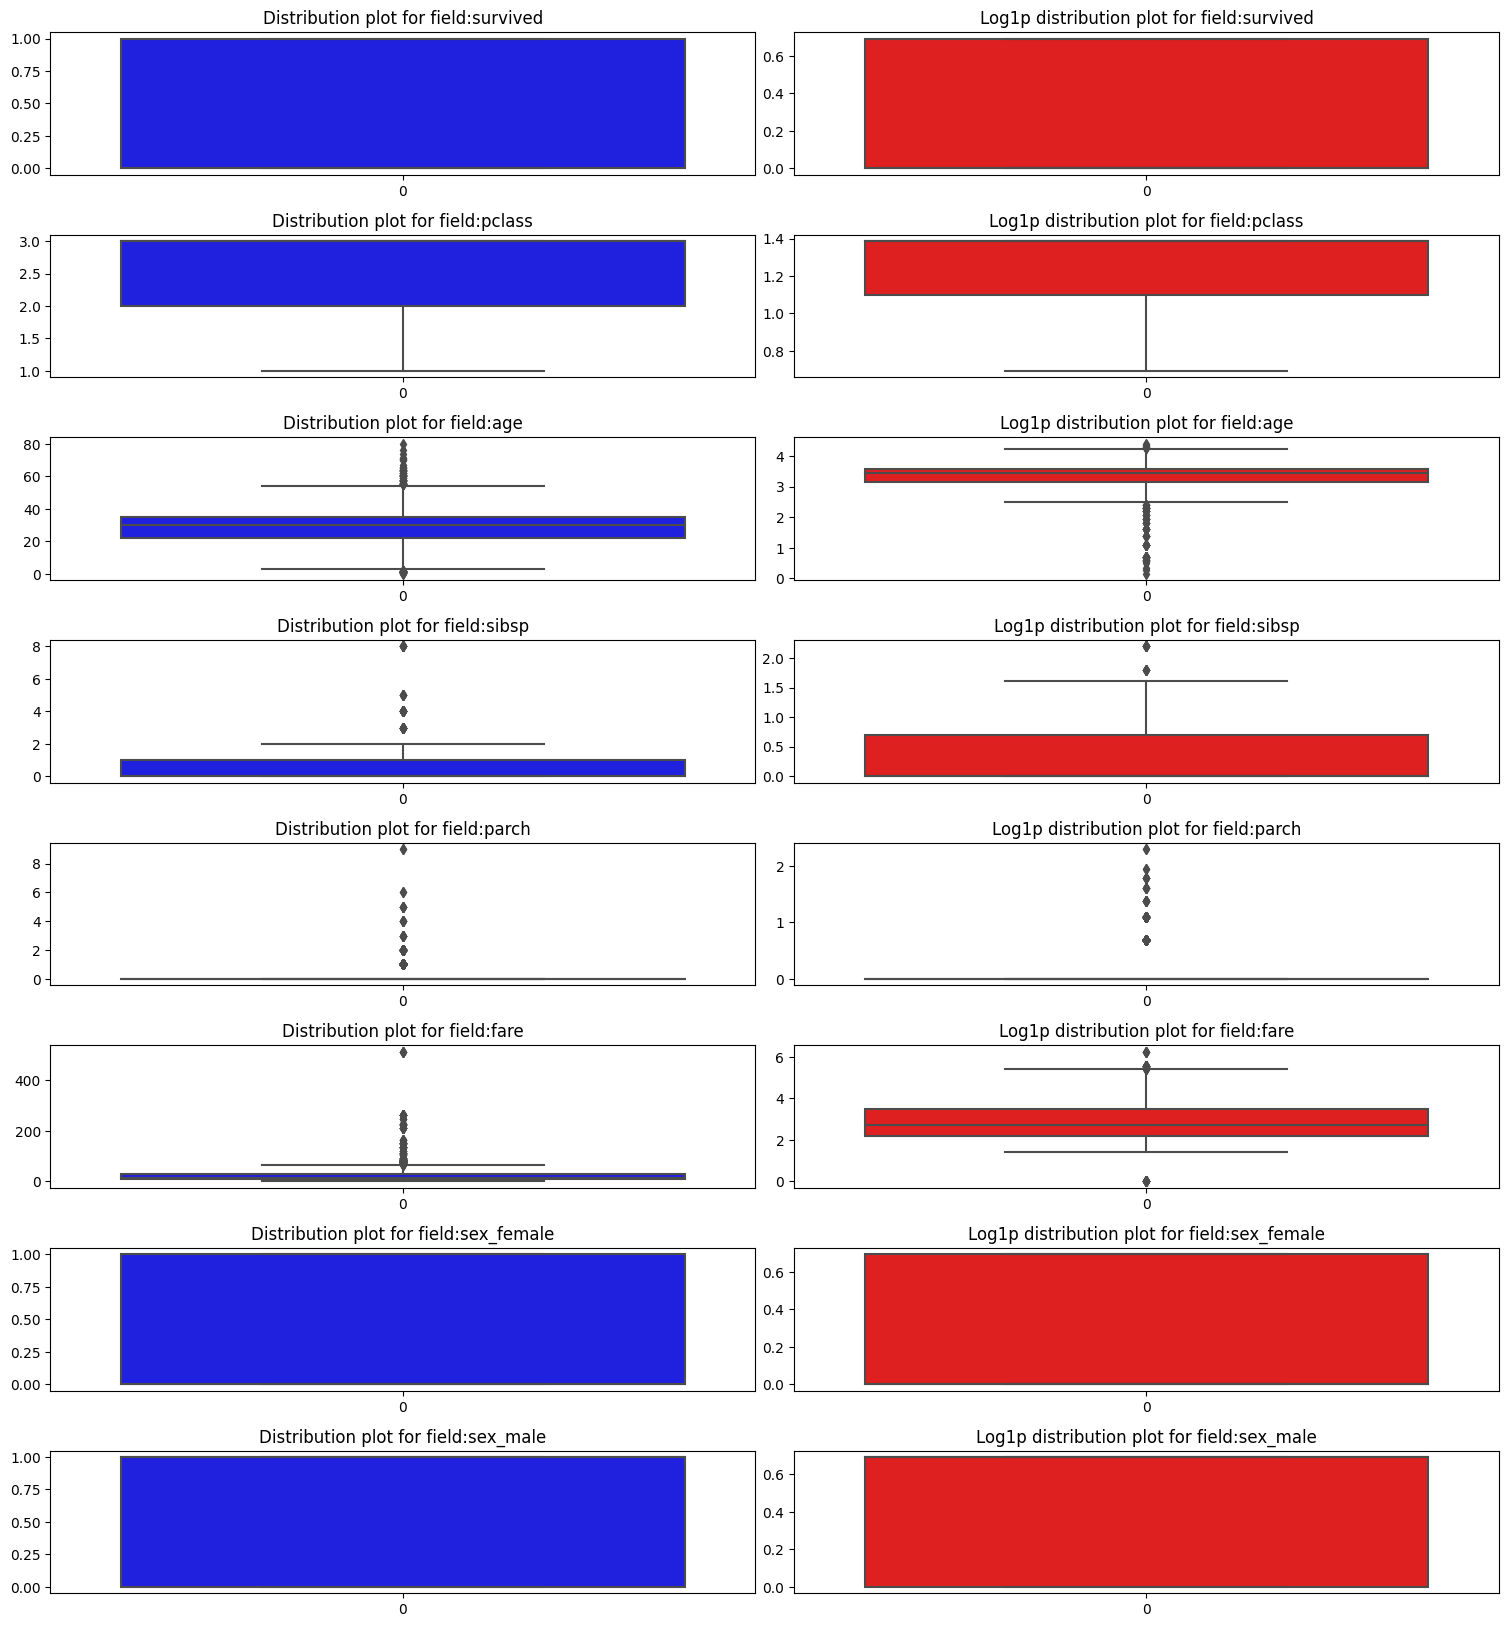

In [22]:
# outlier check
plt.figure(figsize=(15, 20))

for i, c in enumerate(train_df.drop(['passengerid','embarked_C','embarked_Q','embarked_S'],axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(train_df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(train_df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

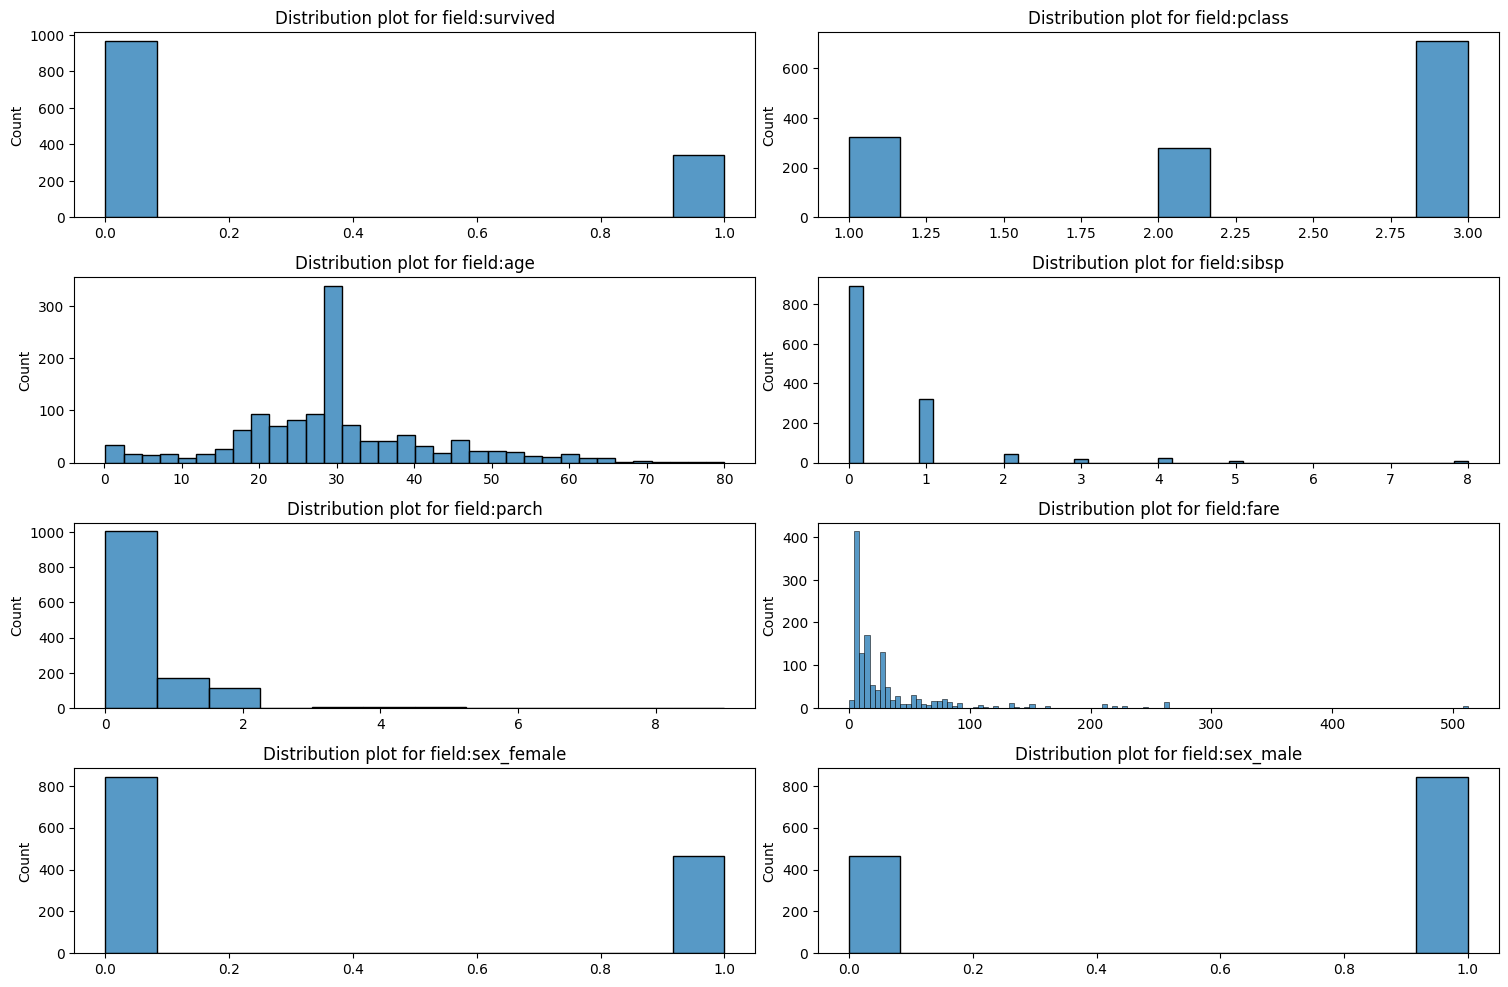

In [23]:
# Handle infinite values (if any)
train_df = train_df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN

plt.figure(figsize=(15, 12))

for i, c in enumerate(train_df.drop(['passengerid','embarked_C','embarked_Q','embarked_S'],axis=1).select_dtypes(include='number').columns):
    # Subplot without auto-removal
    ax = plt.subplot(5, 2, i+1)
    sns.histplot(train_df[c], ax=ax)  # Use ax argument to avoid overlap
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

In [24]:
train_df.columns

Index(['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [25]:
# save skewed features
skewed_cols = ['fare']

# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

/tmp/ipykernel_17/831796967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].apply('log1p')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


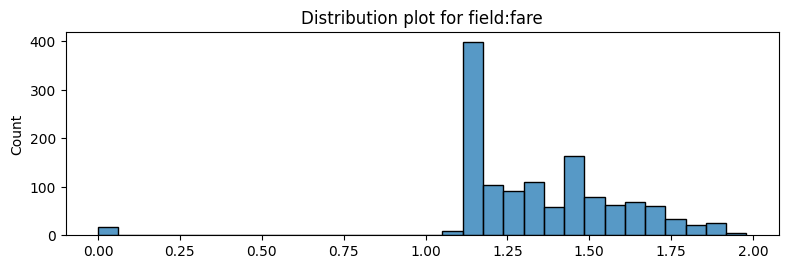

In [26]:
# Next check & fix strongly skewed features
# apply log1p transform
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
rs = RobustScaler()
for c in train_df[['pclass', 'age', 'sibsp', 'parch', 'fare',
       'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']].columns:
    train_df[c] = rs.fit_transform(train_df[c].values.reshape(-1, 1))
train_df.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,0.0,-0.606241,1.0,0.0,-0.308146,0.0,0.0,0.0,0.0,0.0
1,2,1,-2.0,0.624528,1.0,0.0,2.430755,1.0,-1.0,1.0,0.0,-1.0
2,3,1,0.0,-0.298549,0.0,0.0,-0.279274,1.0,-1.0,0.0,0.0,0.0
3,4,1,-2.0,0.393759,1.0,0.0,1.652999,1.0,-1.0,0.0,0.0,0.0
4,5,0,0.0,0.393759,0.0,0.0,-0.273927,0.0,0.0,0.0,0.0,0.0


In [29]:
#Actual dataset to be tested
test_df = train_df[891:]

In [30]:
train_df = train_df[:891]

In [31]:
from sklearn.utils import resample
train_df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [32]:
# Split data on majority and minority.. minority is dataset == 2
minority = train_df[train_df.survived==1]
majority = train_df[train_df.survived==0]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (342, 12)
Majority size: (549, 12)


In [33]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (549, 12)


In [34]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df.drop('survived', axis=1), train_df['survived'], test_size=0.25, random_state=123)

In [36]:
print('Train values shape:', x_train.shape)
print('Test values shape:', x_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (668, 11)
Test values shape: (223, 11)
Train target shape: (668,)
Test target shape: (223,)


In [37]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [38]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

LogisticRegression()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       410
           1       0.76      0.71      0.73       258

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.79       668
weighted avg       0.80      0.80      0.80       668

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       139
           1       0.74      0.73      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

Roc_auc score
-------------------------------------------------------
0.7875556697499144

Confusion matrix
-------------------------------------------------------
[[118  21]
 [ 2

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Support Vector Machines
model = SVC()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       410
           1       0.00      0.00      0.00       258

    accuracy                           0.61       668
   macro avg       0.31      0.50      0.38       668
weighted avg       0.38      0.61      0.47       668

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       139
           1       0.00      0.00      0.00        84

    accuracy                           0.62       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.39      0.62      0.48       223

Roc_auc score
-------------------------------------------------------
0.5

Confusion matrix
-------------------------------------------------------
[[139   0]
 [ 84   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

In [40]:
# Random Forest
model = RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

RandomForestClassifier(n_jobs=-1, random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       258

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       139
           1       0.81      0.73      0.77        84

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

Roc_auc score
-------------------------------------------------------
0.8127355258650223

Confusion matrix
----------------------------------------

In [41]:
# Neural nets
model = MLPClassifier()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

MLPClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       410
           1       0.75      0.71      0.73       258

    accuracy                           0.79       668
   macro avg       0.78      0.78      0.78       668
weighted avg       0.79      0.79      0.79       668

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       139
           1       0.75      0.73      0.74        84

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223

Roc_auc score
-------------------------------------------------------
0.7911527920520727

Confusion matrix
-------------------------------------------------------
[[119  20]
 [ 23  61

In [42]:
# K-Neighbors
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

KNeighborsClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       410
           1       0.70      0.48      0.57       258

    accuracy                           0.72       668
   macro avg       0.71      0.67      0.68       668
weighted avg       0.72      0.72      0.71       668

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       139
           1       0.38      0.23      0.28        84

    accuracy                           0.57       223
   macro avg       0.50      0.50      0.49       223
weighted avg       0.53      0.57      0.54       223

Roc_auc score
-------------------------------------------------------
0.5015844467283317

Confusion matrix
-------------------------------------------------------
[[108  31]
 [

In [43]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=123)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       258

    a

In [44]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=123)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

ExtraTreesClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       258

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       139
           1       0.80      0.73      0.76        84

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

Roc_auc score
-------------------------------------------------------
0.809138403562864

Confusion matrix
------------------------------------------------------